This notebook contains code for extraction of ROIs from mulitspectral WSIs. If the WSI is in a proprietary file format, there are resources (e.g., https://www.glencoesoftware.com/products/ngff-converter/, https://gist.github.com/petebankhead/b5a86caa333de1fdcff6bdee72a20abe) for converting to OME-TIFF file format. The code below can then be used for extracting ROIs for analysis

`DAPI_extraction.ipynb` can then be used to only extract the DAPI channel of the region for nuclear segmentation and evaluation

In [2]:
import zarr
import tifffile
import skimage.io as io

In [3]:
# File path to the OME-TIFF WSI
slide_path = r"D:\8MyLym\stitched_OMETIFFs\8MyLym_1_RU22-00361A_Scan1_Stitched.ome.tif"
# (x, y, width, height) coordinate system
ROI_coords_size = (10000, 7680, 256, 256)
# DAPI channel in the order of channels
DAPI_channel = 0

In [4]:
# Read the WSI as a Zarr object
with tifffile.TiffFile(slide_path) as tif:
    store = tif.series[0].aszarr()
slide_aszarr = zarr.open(store, mode='r')

In [5]:
# Read the ROI as a numpy array from the Zarr WSI
x = ROI_coords_size[1]
y = ROI_coords_size[0]
height = ROI_coords_size[3]
width = ROI_coords_size[2]
ROI = slide_aszarr[0][y:y+width, x:x+height]

c:\Users\Waluigi\anaconda3\Lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


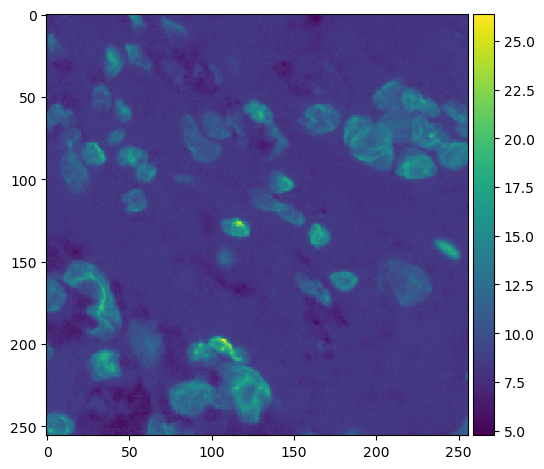

In [7]:
# Render the extracted ROI's channel 1 (e.g., DAPI)
io.imshow(ROI[:,:,0])

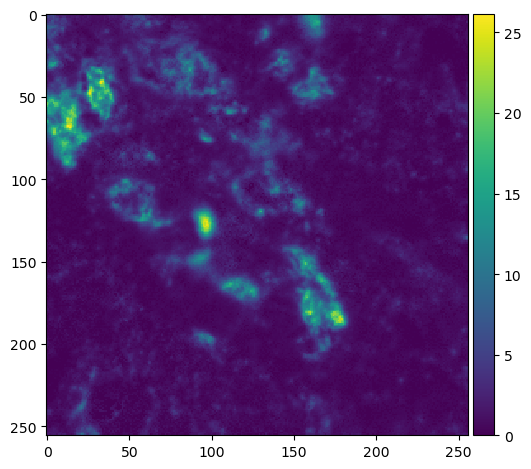

In [10]:
# Render the extracted ROI's channel 3
io.imshow(ROI[:,:,3])

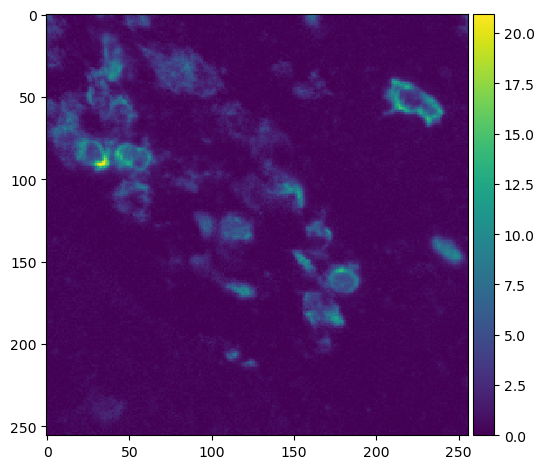

In [11]:
# Render the extracted ROI's channel 4
io.imshow(ROI[:,:,4])

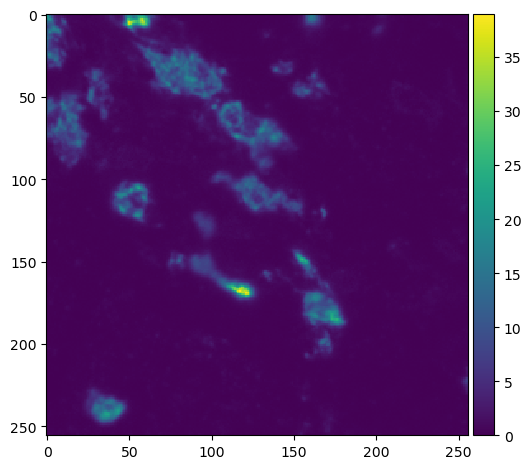

In [12]:
# Render the extracted ROI's channel 5
io.imshow(ROI[:,:,5])

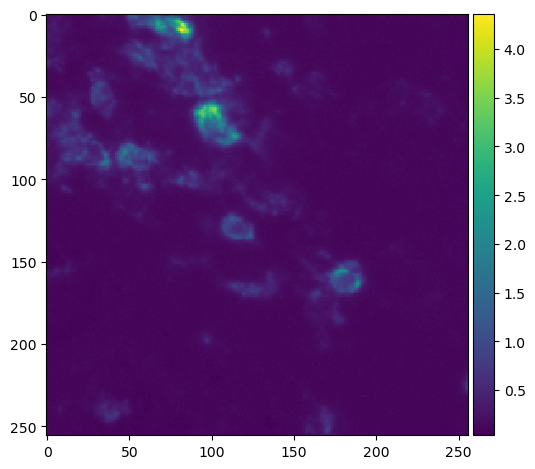

In [15]:
# Render the extracted ROI's channel 8
io.imshow(ROI[:,:,8])